# Hotel Booking Cancellation Analysis

# Business Problem
☐ In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal Hotel room use. Consequently, lowering cancellation rates is both Hotel's primary goal in order to increase their efficiency in generating revenue and for us to offer thorough business advice to address this problem

☐ The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topic of this report.


### Importting Liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Data Base

In [2]:
data = pd.read_csv("hotel_bookings.csv")

### Ask Some Question to the Datasate

A. Shape of the data sate

In [3]:
data.shape

(119390, 32)

B. How the data looks like

In [4]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4566,Resort Hotel,0,162,2016,March,13,24,0,3,2,...,No Deposit,NaN,NaN,0,Transient-Party,84.00,0,0,Check-Out,27/3/2016
58885,City Hotel,1,605,2016,October,43,17,1,2,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,20/9/2016
5347,Resort Hotel,0,7,2016,April,18,26,0,2,1,...,No Deposit,248.0,NaN,0,Transient,30.00,0,0,Check-Out,28/4/2016
19664,Resort Hotel,0,1,2015,December,53,29,0,1,2,...,No Deposit,240.0,NaN,0,Transient,65.00,0,1,Check-Out,30/12/2015
118474,City Hotel,0,23,2017,August,33,18,0,2,3,...,No Deposit,159.0,NaN,0,Transient,283.23,0,0,Check-Out,20/8/2017


C .Cheeck the data type all the columns

In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

D. Is there any null value present or not

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"],format='mixed')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
data.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for  col in data.describe(include="object").columns:
    print(col)
    print(data[col].unique())
    print("----------------------------------------")

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' '

In [13]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
data.drop(["company","agent"],axis = 1,inplace = True)

In [15]:
data.shape

(119390, 30)

In [16]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [17]:
data.dropna(inplace = True)

In [18]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [19]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

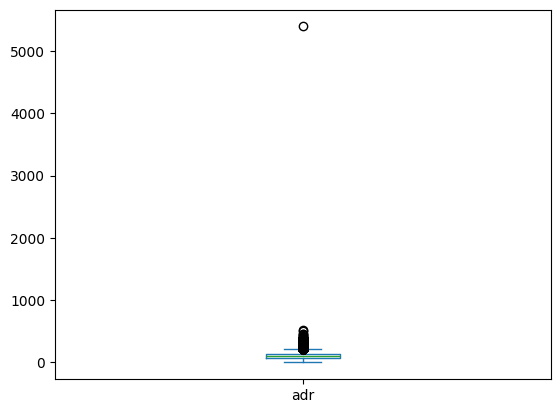

In [20]:
data["adr"].plot(kind = "box")

In [21]:
data = data[data["adr"]<5000]

## Data Visualization

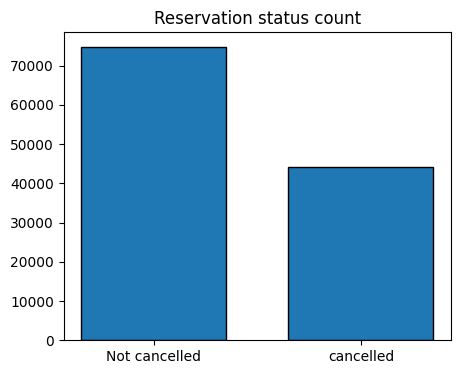

In [22]:
cancelled_prec = data["is_canceled"].value_counts(normalize=True)
cancelled_prec

plt.figure(figsize = (5,4))
plt.title("Reservation status count")
plt.bar(["Not cancelled","cancelled"],data["is_canceled"].value_counts(),edgecolor = "k",width =0.7)
plt.show()

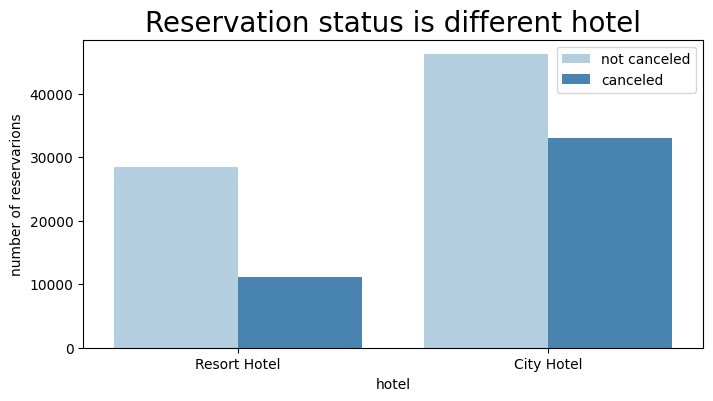

In [23]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(data =data,x = data["hotel"],hue = "is_canceled",palette = "Blues")
ax1.legend(["not canceled","canceled"])
plt.title("Reservation status is different hotel",size = 20)
plt.xlabel("hotel")
plt.ylabel("number of reservarions")
plt.show()


In [24]:
resort_hotel = data[data["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [25]:
city_hotel = data[data["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [26]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

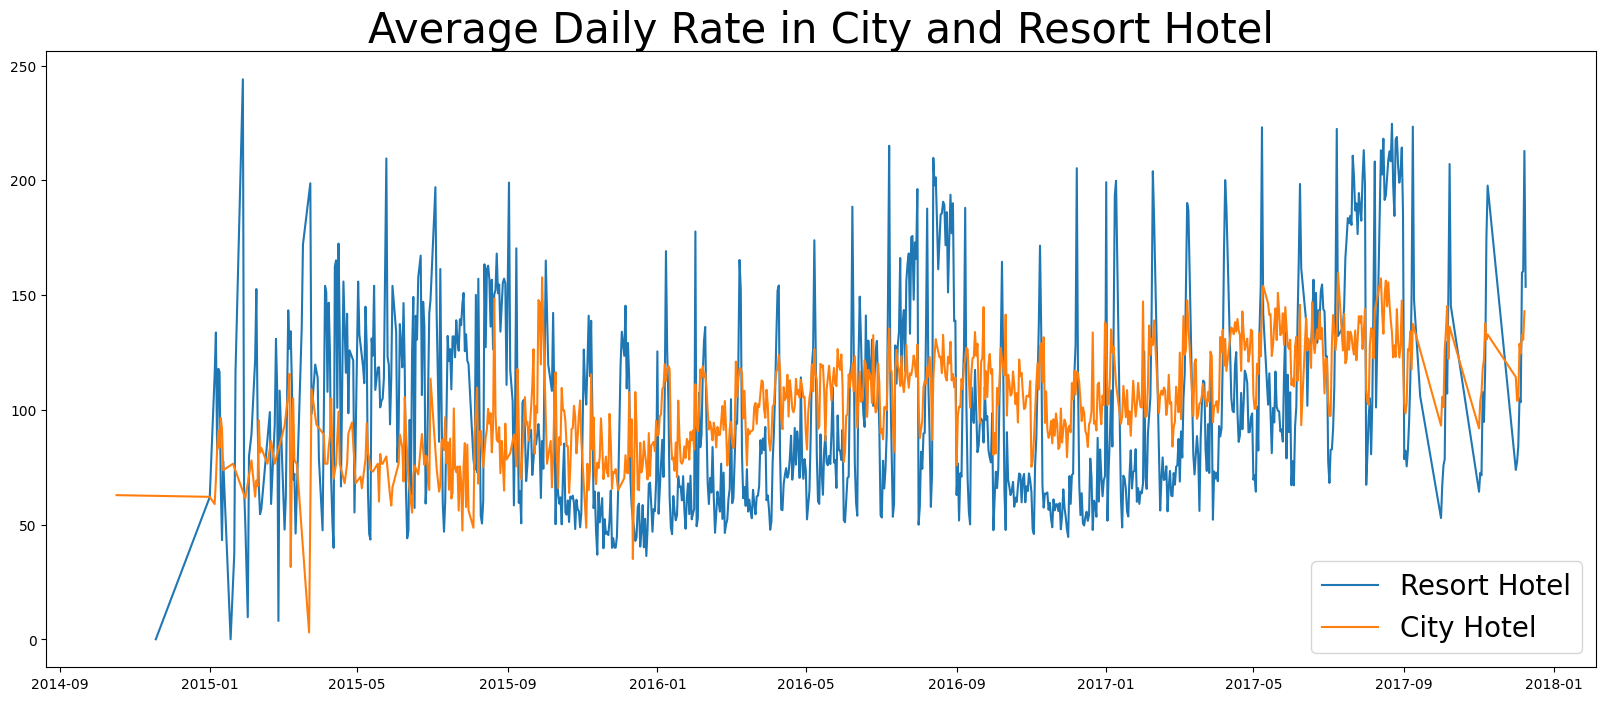

In [27]:
plt.figure(figsize = (20,8))
plt.title("Average Daily Rate in City and Resort Hotel",fontsize  = 30)
plt.plot(resort_hotel.index,resort_hotel["adr"],label = "Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label = "City Hotel")
plt.legend(fontsize = 20)
plt.show()

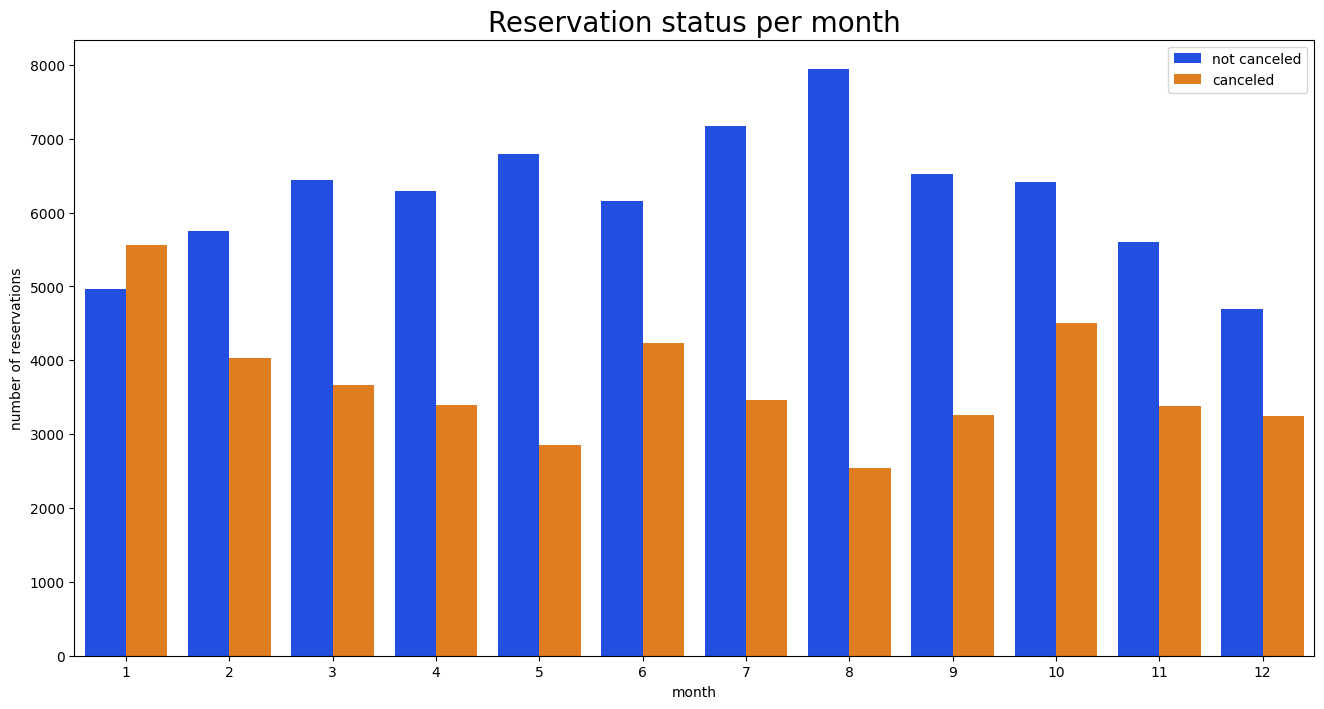

In [28]:
data["month"] = data["reservation_status_date"].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(data = data,x ="month",hue = "is_canceled",palette = 'bright')
ax1.legend(bbox_to_anchor = (1,1))
plt.title("Reservation status per month",size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

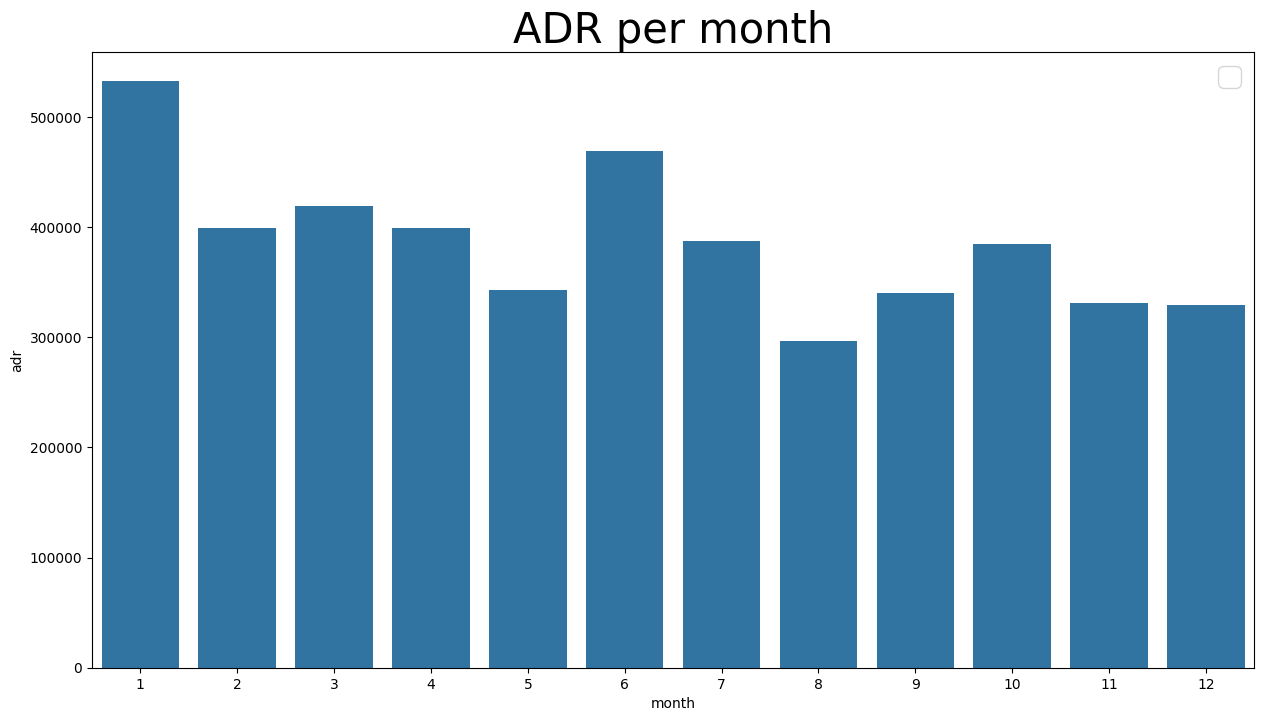

In [29]:
plt.figure(figsize=(15, 8))
plt.title("ADR per month", fontsize=30)

# Explicitly specify x and y parameters
sns.barplot(x="month", y="adr", data=data[data["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())

plt.legend(fontsize=20)
plt.show()


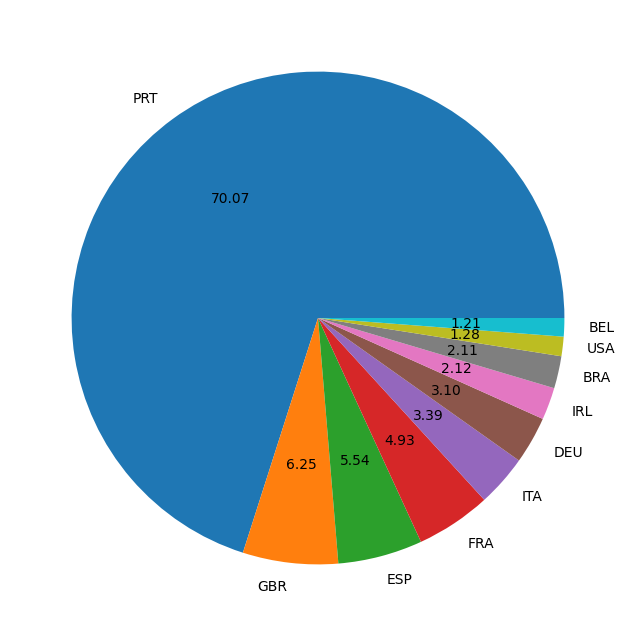

In [30]:
canceled_data = data[data["is_canceled"]==1]
top_10_country = canceled_data["country"].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.pie(top_10_country,autopct="%.2f",labels = top_10_country.index)
plt.show()

In [31]:
data["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [32]:
data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [33]:
canceled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

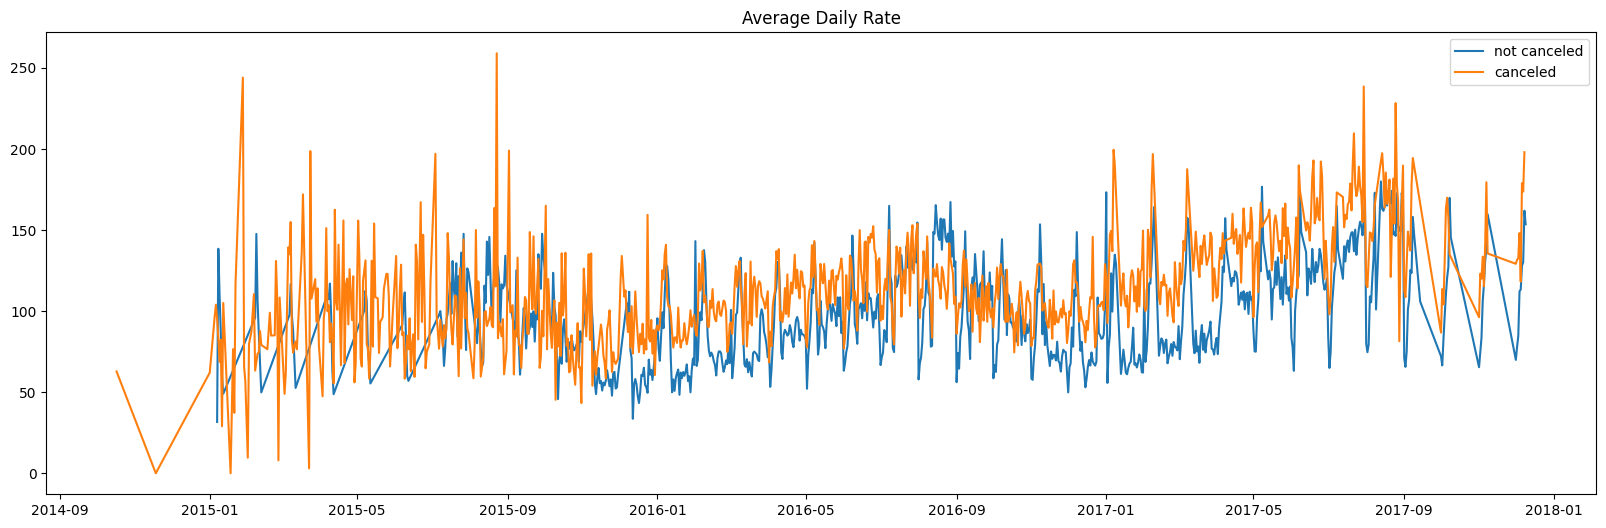

In [34]:
canceled_data_adr = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_data_adr.reset_index(inplace = True)
canceled_data_adr.sort_values("reservation_status_date",inplace = True)


not_canceled_data = data[data["is_canceled"]==0]
not_canceled_data_adr = not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_data_adr.reset_index(inplace = True)
not_canceled_data_adr.sort_values("reservation_status_date",inplace = True)

plt.figure(figsize = (20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_data_adr["reservation_status_date"],not_canceled_data_adr["adr"],label = "not canceled")
plt.plot(canceled_data_adr["reservation_status_date"],canceled_data_adr["adr"],label = "canceled")
plt.legend()
plt.show()

In [35]:
canceled_data_adr =canceled_data_adr[(canceled_data_adr["reservation_status_date"]>"2016")& (canceled_data_adr["reservation_status_date"]<"2017-09")]
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr["reservation_status_date"]>"2016")&(not_canceled_data_adr["reservation_status_date"]<"2017-09")]

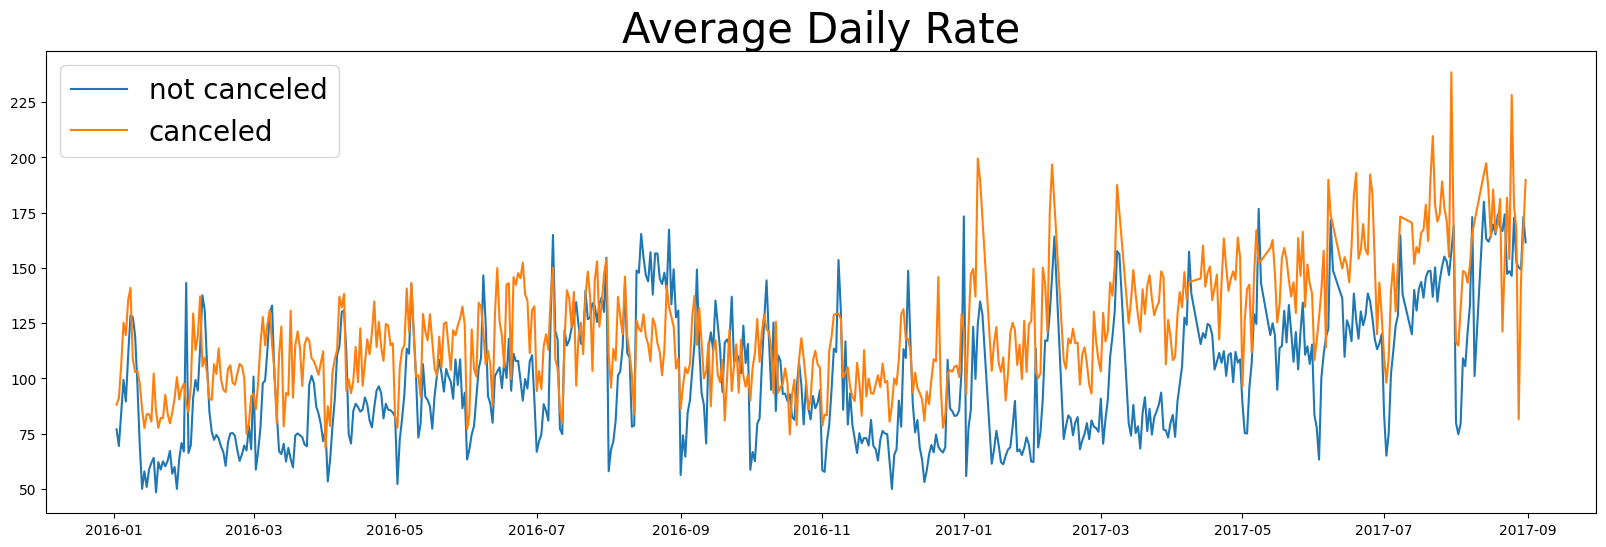

In [36]:
plt.figure(figsize = (20,6))
plt.title("Average Daily Rate",fontsize = 30)
plt.plot(not_canceled_data_adr["reservation_status_date"],not_canceled_data_adr["adr"],label = "not canceled")
plt.plot(canceled_data_adr["reservation_status_date"],canceled_data_adr["adr"],label = "canceled")
plt.legend(fontsize = 20)